In [1]:
### Wrangling Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import haversine
from haversine import haversine, Unit
from matplotlib.pyplot import figure
import scipy
from matplotlib.ticker import FormatStrFormatter
import datetime
from matplotlib import dates
from datetime import datetime
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange  
import os

In [3]:
#Import the database
path = r'C:\Users\Mary\Desktop\Data Analyst CF\Part 6'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_2.2.csv'), index_col=0)

In [5]:
df.shape

(112657, 40)

In [6]:
def overview(dataframe):
    """This function will return the overview of the dataframe"""
    
    print("Shape of the dataframe is : {}".format(dataframe.shape))
    print("**"*30)
    print("Information about features : ",dataframe.info())
    print("**"*30)
    print("Total number of null values : \n ",dataframe.isnull().sum())
    print("**"*30)
    print("Description : \n ",dataframe.describe())
    print("**"*30)
    
    return dataframe.head(5)


In [7]:
overview(df)

Shape of the dataframe is : (112657, 40)
************************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 112657 entries, 0 to 112656
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   product_id                     112657 non-null  object 
 1   product_name_lenght            112657 non-null  float64
 2   product_description_lenght     112657 non-null  float64
 3   product_photos_qty             112657 non-null  float64
 4   product_weight_g               112657 non-null  float64
 5   product_length_cm              112657 non-null  float64
 6   product_height_cm              112657 non-null  float64
 7   product_width_cm               112657 non-null  float64
 8   order_id                       112657 non-null  object 
 9   order_item_id                  112657 non-null  int64  
 10  seller_id                      112657 non-null  ob

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,...,review_id,review_score,customer_unique_id,zip_code_prefix_seller,lat_seller,lng_seller,seller_city,seller_state,product_category_name,review_category
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,...,d71da8fd8c6e3adef26be965f065b8a1,5,b1a1199364a4a7fe27c4486ab63f550d,13848,-22.331249,-46.922580,mogi guaçu,SP,perfumery,Good review
1,a035b83b3628decee6e3823924e0c10f,53.0,2235.0,3.0,1450.0,20.0,25.0,20.0,b18cb761efbe70da4838435a349abd07,1,...,0f0f85749cb82321d902e390a9c33694,4,fc68ba9c34778e17224154c255b5656e,84200,-24.256442,-49.709951,jaguariaíva,PR,perfumery,Good review
2,091107484dd7172f5dcfed173e4a960e,50.0,260.0,2.0,183.0,16.0,8.0,13.0,a7708ffa8966514c098d15e1abfa6417,1,...,39489f8518181b82cb86ce264e1ccc55,5,c67329fd07872a68d6d6d1f1626a0760,3804,-23.502716,-46.482996,sao paulo,SP,perfumery,Good review
3,e8b61f78db501ea0ca45677d1ca27de2,49.0,120.0,1.0,400.0,50.0,10.0,25.0,a7708ffa8966514c098d15e1abfa6417,2,...,39489f8518181b82cb86ce264e1ccc55,5,c67329fd07872a68d6d6d1f1626a0760,3804,-23.502716,-46.482996,sao paulo,SP,toys,Good review
4,ccac9976bafbf7e587bd2c29302e2314,53.0,2235.0,3.0,1500.0,20.0,25.0,20.0,206d1a13596872a713dba14504fdf699,1,...,36b616f738d1f617cc12aeb2c01705f3,3,1b6d2664b20a04a1fa9c900aedf29440,71920,-15.829934,-48.032895,brasilia,DF,perfumery,Medium review


In [8]:
# 1. Dealing with freight_values
df['freight_value'].value_counts(dropna = False)


15.10    3670
7.78     2235
11.85    1910
14.10    1863
18.23    1573
         ... 
45.33       1
68.17       1
67.81       1
70.73       1
79.56       1
Name: freight_value, Length: 6870, dtype: int64

In [9]:
# Creating a flag for freight_values - low price, Medium price, High price 
### low price = 0 - 15
### Medium price = 15-40
### High Price > 40

In [10]:
df.loc[df['freight_value']>40, 'freight_flag'] = 'High freight'

In [11]:
df.loc[(df['freight_value'] <= 40) & (df['freight_value'] > 15), 'freight_flag'] = 'Medium freight'

In [12]:
df.loc[df['freight_value'] <= 15, 'freight_flag'] = 'Low freight'

In [13]:
df['freight_flag'].value_counts(dropna = False)

Medium freight    64255
Low freight       40961
High freight       7441
Name: freight_flag, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'Medium freight'),
  Text(1, 0, 'Low freight'),
  Text(2, 0, 'High freight')])

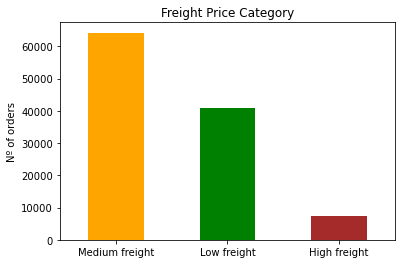

In [14]:
df['freight_flag'].value_counts().plot.bar(color = ['orange', 'green', 'brown'])
plt.ylabel('Nº of orders')
plt.title('Freight Price Category')
plt.xticks(color = 'black', rotation = 360, horizontalalignment = 'center')

In [15]:
# Find the % of the freight_flag

df['freight_flag'].value_counts(normalize=True) * 100
 

Medium freight    57.035959
Low freight       36.359037
High freight       6.605005
Name: freight_flag, dtype: float64

In [16]:

df.columns

Index(['product_id', 'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'order_id', 'order_item_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'zip_code_prefix_customer', 'lat_customer', 'lng_customer',
       'customer_city', 'customer_state', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'customer_unique_id', 'zip_code_prefix_seller', 'lat_seller',
       'lng_seller', 'seller_city', 'seller_state', 'product_category_name',
       'review_category', 'freight_flag'],
      dtype='object')

In [17]:
# Change datatype
df["order_purchase_timestamp"]       = pd.to_datetime(df["order_purchase_timestamp"])
df["order_approved_at"]              = pd.to_datetime(df["order_approved_at"])
df["order_delivered_carrier_date"]   = pd.to_datetime(df["order_delivered_carrier_date"])
df["order_delivered_customer_date"]  = pd.to_datetime(df["order_delivered_customer_date"])
df["order_estimated_delivery_date"]  = pd.to_datetime(df["order_estimated_delivery_date"])
df["shipping_limit_date"]            = pd.to_datetime(df["shipping_limit_date"])

In [18]:
overview(df)

Shape of the dataframe is : (112657, 41)
************************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 112657 entries, 0 to 112656
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   product_id                     112657 non-null  object        
 1   product_name_lenght            112657 non-null  float64       
 2   product_description_lenght     112657 non-null  float64       
 3   product_photos_qty             112657 non-null  float64       
 4   product_weight_g               112657 non-null  float64       
 5   product_length_cm              112657 non-null  float64       
 6   product_height_cm              112657 non-null  float64       
 7   product_width_cm               112657 non-null  float64       
 8   order_id                       112657 non-null  object        
 9   order_item_id                  112

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,...,review_score,customer_unique_id,zip_code_prefix_seller,lat_seller,lng_seller,seller_city,seller_state,product_category_name,review_category,freight_flag
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,...,5,b1a1199364a4a7fe27c4486ab63f550d,13848,-22.331249,-46.922580,mogi guaçu,SP,perfumery,Good review,Low freight
1,a035b83b3628decee6e3823924e0c10f,53.0,2235.0,3.0,1450.0,20.0,25.0,20.0,b18cb761efbe70da4838435a349abd07,1,...,4,fc68ba9c34778e17224154c255b5656e,84200,-24.256442,-49.709951,jaguariaíva,PR,perfumery,Good review,Medium freight
2,091107484dd7172f5dcfed173e4a960e,50.0,260.0,2.0,183.0,16.0,8.0,13.0,a7708ffa8966514c098d15e1abfa6417,1,...,5,c67329fd07872a68d6d6d1f1626a0760,3804,-23.502716,-46.482996,sao paulo,SP,perfumery,Good review,Low freight
3,e8b61f78db501ea0ca45677d1ca27de2,49.0,120.0,1.0,400.0,50.0,10.0,25.0,a7708ffa8966514c098d15e1abfa6417,2,...,5,c67329fd07872a68d6d6d1f1626a0760,3804,-23.502716,-46.482996,sao paulo,SP,toys,Good review,Low freight
4,ccac9976bafbf7e587bd2c29302e2314,53.0,2235.0,3.0,1500.0,20.0,25.0,20.0,206d1a13596872a713dba14504fdf699,1,...,3,1b6d2664b20a04a1fa9c900aedf29440,71920,-15.829934,-48.032895,brasilia,DF,perfumery,Medium review,Medium freight


In [19]:
# Calculating the difference between date of order and delivery
df['pur_del'] = abs(df['order_delivered_customer_date'] - df['order_purchase_timestamp'])

In [20]:
df['start_date'] = df['order_purchase_timestamp'].dt.date
df['end_date'] = df['order_delivered_customer_date'].dt.date

In [21]:
df['n_of_days'] = round(((df['end_date'] - df['start_date'])).dt.days)

In [22]:
df.head(5)

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,...,lng_seller,seller_city,seller_state,product_category_name,review_category,freight_flag,pur_del,start_date,end_date,n_of_days
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,...,-46.922580,mogi guaçu,SP,perfumery,Good review,Low freight,3 days 00:25:24,2018-04-24,2018-04-27,3
1,a035b83b3628decee6e3823924e0c10f,53.0,2235.0,3.0,1450.0,20.0,25.0,20.0,b18cb761efbe70da4838435a349abd07,1,...,-49.709951,jaguariaíva,PR,perfumery,Good review,Medium freight,6 days 03:55:11,2018-07-04,2018-07-10,6
2,091107484dd7172f5dcfed173e4a960e,50.0,260.0,2.0,183.0,16.0,8.0,13.0,a7708ffa8966514c098d15e1abfa6417,1,...,-46.482996,sao paulo,SP,perfumery,Good review,Low freight,2 days 03:59:04,2018-04-23,2018-04-25,2
3,e8b61f78db501ea0ca45677d1ca27de2,49.0,120.0,1.0,400.0,50.0,10.0,25.0,a7708ffa8966514c098d15e1abfa6417,2,...,-46.482996,sao paulo,SP,toys,Good review,Low freight,2 days 03:59:04,2018-04-23,2018-04-25,2
4,ccac9976bafbf7e587bd2c29302e2314,53.0,2235.0,3.0,1500.0,20.0,25.0,20.0,206d1a13596872a713dba14504fdf699,1,...,-48.032895,brasilia,DF,perfumery,Medium review,Medium freight,7 days 21:46:24,2018-07-29,2018-08-06,8


In [23]:
df.shape

(112657, 45)

In [24]:
df.dtypes

product_id                                object
product_name_lenght                      float64
product_description_lenght               float64
product_photos_qty                       float64
product_weight_g                         float64
product_length_cm                        float64
product_height_cm                        float64
product_width_cm                         float64
order_id                                  object
order_item_id                              int64
seller_id                                 object
shipping_limit_date               datetime64[ns]
price                                    float64
freight_value                            float64
zip_code_prefix_customer                   int64
lat_customer                             float64
lng_customer                             float64
customer_city                             object
customer_state                            object
payment_sequential                         int64
payment_type        

In [25]:
# Check the frequency of processing days
df['n_of_days'].value_counts(dropna = False)

7      8723
8      8338
6      7759
9      7289
10     6846
       ... 
97        1
103       1
172       1
173       1
191       1
Name: n_of_days, Length: 139, dtype: int64

In [26]:
days = mdates.DayLocator()

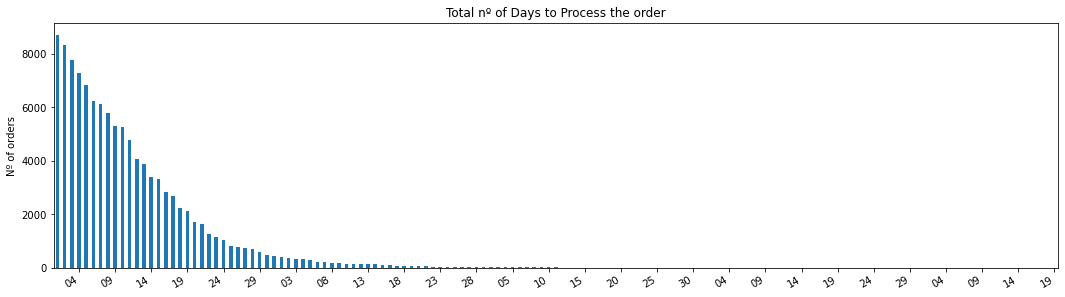

In [27]:
df['n_of_days'].value_counts().plot.bar()
plt.ylabel('Nº of orders')
plt.title('Total nº of Days to Process the order')
plt.xticks(color = 'black', horizontalalignment = 'center')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18, 5, forward=True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.gcf().autofmt_xdate()
plt.show()



In [28]:
# Try to figure the distance between seller and customer
import geopy
from geopy.distance import geodesic
from geopy.distance import great_circle
from geopy.geocoders import Nominatim
from vincenty import vincenty
# Define the two points
start = ('lat_seller', 'lng_seller')
stop = ('lat_customer', 'lat_customer')


In [29]:
def distance_calc (row):
    start = (row['lat_seller'], row['lng_seller'])
    stop = (row['lat_customer'], row['lat_customer'])

    return vincenty(start, stop)

In [30]:
df['distance'] = df.apply (lambda row: distance_calc (row),axis=1)


In [31]:
df["distance"] = df["distance"].astype(str)

In [32]:
df["distance"] = df["distance"].astype(float)

In [33]:
df.head(5)

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,...,seller_city,seller_state,product_category_name,review_category,freight_flag,pur_del,start_date,end_date,n_of_days,distance
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,...,mogi guaçu,SP,perfumery,Good review,Low freight,3 days 00:25:24,2018-04-24,2018-04-27,3,2399.699757
1,a035b83b3628decee6e3823924e0c10f,53.0,2235.0,3.0,1450.0,20.0,25.0,20.0,b18cb761efbe70da4838435a349abd07,1,...,jaguariaíva,PR,perfumery,Good review,Medium freight,6 days 03:55:11,2018-07-04,2018-07-10,6,2662.455144
2,091107484dd7172f5dcfed173e4a960e,50.0,260.0,2.0,183.0,16.0,8.0,13.0,a7708ffa8966514c098d15e1abfa6417,1,...,sao paulo,SP,perfumery,Good review,Low freight,2 days 03:59:04,2018-04-23,2018-04-25,2,2340.750167
3,e8b61f78db501ea0ca45677d1ca27de2,49.0,120.0,1.0,400.0,50.0,10.0,25.0,a7708ffa8966514c098d15e1abfa6417,2,...,sao paulo,SP,toys,Good review,Low freight,2 days 03:59:04,2018-04-23,2018-04-25,2,2377.637320
4,ccac9976bafbf7e587bd2c29302e2314,53.0,2235.0,3.0,1500.0,20.0,25.0,20.0,206d1a13596872a713dba14504fdf699,1,...,brasilia,DF,perfumery,Medium review,Medium freight,7 days 21:46:24,2018-07-29,2018-08-06,8,2701.745065


In [34]:
df=df.reset_index(drop=True)


In [35]:
df.head(5)

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,...,seller_city,seller_state,product_category_name,review_category,freight_flag,pur_del,start_date,end_date,n_of_days,distance
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,...,mogi guaçu,SP,perfumery,Good review,Low freight,3 days 00:25:24,2018-04-24,2018-04-27,3,2399.699757
1,a035b83b3628decee6e3823924e0c10f,53.0,2235.0,3.0,1450.0,20.0,25.0,20.0,b18cb761efbe70da4838435a349abd07,1,...,jaguariaíva,PR,perfumery,Good review,Medium freight,6 days 03:55:11,2018-07-04,2018-07-10,6,2662.455144
2,091107484dd7172f5dcfed173e4a960e,50.0,260.0,2.0,183.0,16.0,8.0,13.0,a7708ffa8966514c098d15e1abfa6417,1,...,sao paulo,SP,perfumery,Good review,Low freight,2 days 03:59:04,2018-04-23,2018-04-25,2,2340.750167
3,e8b61f78db501ea0ca45677d1ca27de2,49.0,120.0,1.0,400.0,50.0,10.0,25.0,a7708ffa8966514c098d15e1abfa6417,2,...,sao paulo,SP,toys,Good review,Low freight,2 days 03:59:04,2018-04-23,2018-04-25,2,2377.637320
4,ccac9976bafbf7e587bd2c29302e2314,53.0,2235.0,3.0,1500.0,20.0,25.0,20.0,206d1a13596872a713dba14504fdf699,1,...,brasilia,DF,perfumery,Medium review,Medium freight,7 days 21:46:24,2018-07-29,2018-08-06,8,2701.745065


In [36]:
# save data
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'df_2.3.csv'))